# Technical Analysis #

[Investopedia's definition of technical analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp) is "*a method of evaluating statistical trends in trading activity, typically involving price movement and volume. It is used to identify trading and investment opportunities.*"

This Notebook aims to show how to:
1. Programmatically source financial data, 
2. Apply technical analysis on this data, and 
3. Plot the results. 

The first step is to import the packages required for this exercise.

## Import libraries ##

In [272]:
# Import packages

# Data Frames
import pandas as pd

# Vector operations
import numpy as np

# Financial Data 
import yfinance as yf # pip install yfinance

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

## Read, write and summarize raw data ##

In [273]:
# Read in the data.
# Set ticker and get historical data for past time period.

ticker = 'AAPL'
period = '5y'
market_data = yf.download(ticker, period=period, multi_level_index=False)
market_data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-14,75.784447,76.969643,75.660843,76.758781,161954400
2020-01-15,75.459686,76.467949,75.025841,75.583298,121923600
2020-01-16,76.404915,76.516411,75.641449,76.005005,108829200
2020-01-17,77.250801,77.253220,76.346756,76.654564,137816400
2020-01-21,76.727264,77.321068,76.589111,76.877533,110843200
...,...,...,...,...,...
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900


In [274]:
market_data.describe()

,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,153.339602,154.883276,151.622747,153.193782,9.005467e+07
std,42.180943,42.317257,41.957772,42.131371,5.324266e+07
min,54.509754,55.513122,51.652713,55.411085,2.323470e+07
25%,127.998215,128.934129,125.908603,127.546157,5.494580e+07
50%,151.510132,153.165287,149.577501,151.232710,7.583400e+07
75%,177.861496,179.125321,176.034565,177.773734,1.062438e+08
max,259.019989,260.100006,257.630005,258.190002,4.265100e+08


In [275]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-14 to 2025-01-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [276]:
# Timestamp the filename

# Get the current date and time.
filename = dt.datetime.now()
# Create a string format from the current date and time.
filename = filename.strftime("_%Y%m%d_%H%M%S") 
# Prepend data folders, append file extension.
filename = 'data/' + ticker + filename + ".csv"

# Show the filename.
filename

'data/AAPL_20250113_221626.csv'

In [277]:
# Write out the data.
# Save the data to a CSV file.
market_data.to_csv(filename)

## Initial Observations ##

1. The data is clean: no blank values or NaNs.

2. The data contains trading volumes and share price information for the specified ticker and the specified (default = daily) time interval. The share price information is split into the opening  price, the highest price, the lowest price, and the closing price. These four data points for share price are often abbreviated to ['ohlc'](https://en.wikipedia.org/wiki/Open-high-low-close_chart).

3. The 'Date' column has already been loaded as dtype = datetime and set as the index of the Data Frame.

## Plotting Share Price for the specified Ticker ##

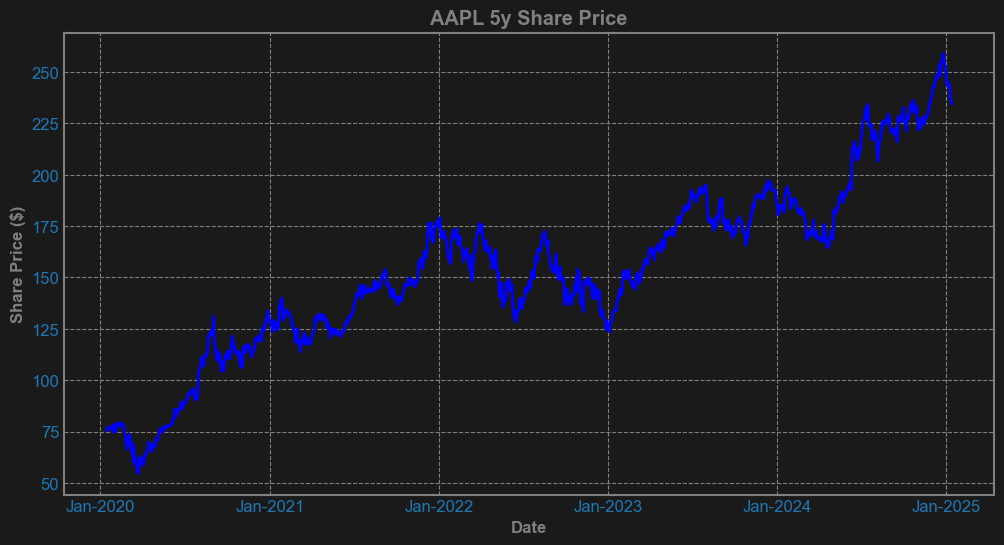

In [279]:
# Plot the Closing prices

# Style taken from the follow:
# https://coderslegacy.com/python/dark-themes-in-matplotlib/#:~:text=Matplotlib%20provides%20a%20built-in%20theme%20that%20can%20be,color%20to%20white%2C%20providing%20a%20dark%20mode%20theme.
plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots(figsize = (12, 6))

# Title.
ax.set_title(f'{ticker} {period} Share Price', weight='bold', color = 'grey')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'grey')
ax.set_ylabel('Share Price ($)', weight ='bold', color = 'grey')

# Set date format on x-axis
# https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Generate plot
ax.plot(market_data["Close"], color = 'blue')

# Add Grid Lines
ax.grid(True)

## Technical Indicators ("Technicals") ##

[Investopedia's deifntion]((https://www.investopedia.com/terms/t/technicalindicator.asp)) of Technical Indicators is "*heuristic or pattern-based signals produced by the price, volume, and/or open interest of a security or contract used by traders who follow technical analysis*"

There are two basic types of indicators:
- Overlays: these indicators use the same axis as the ohlc price information, and are overlaid on the price chart.
- Oscillators: these indicators plot values that range from a minimum and maximum value either above or below the price chart.

There are hundreds (if not thousands) of different technical indicators that are used by traders. The scope of this notebook is to focus on the below:
- Moving Averages
- Relative Strength Index (RSI)
- Moving Average Convergence Divergence (MACD)

## Moving Averages ##

"*Moving averages smooth out price data to create a single flowing line, helping identify trend direction. The two most frequently used types are the Simple Moving Average (SMA) and the Exponential Moving Average (EMA).*" [Source: pyquantnews](https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading)

In [280]:
# Create a function to calculate simple moving average (SMA), taking data and time period as inputs, returning the SMA.
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

In [281]:
# Set time windows for short and long simple moving averages (SMAs).
short_window = 50
long_window = 200

# Add columns for the both SMAs to the Data Frame, using function created previously.
market_data['sma ' + str(short_window)] = calculate_sma(market_data['Close'], short_window)
market_data['sma ' + str(long_window)] = calculate_sma(market_data['Close'], long_window)

# Check the Data Frame.
market_data

,Close,High,Low,Open,Volume,sma 50,sma 200
Date,,,,,,,
2020-01-14,75.784447,76.969643,75.660843,76.758781,161954400,NaN,NaN
2020-01-15,75.459686,76.467949,75.025841,75.583298,121923600,NaN,NaN
2020-01-16,76.404915,76.516411,75.641449,76.005005,108829200,NaN,NaN
2020-01-17,77.250801,77.253220,76.346756,76.654564,137816400,NaN,NaN
2020-01-21,76.727264,77.321068,76.589111,76.877533,110843200,NaN,NaN
...,...,...,...,...,...,...,...
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,214.091676
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,214.448965
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900,238.598924,214.804171


Text(2024-05-01 00:00:00, 125, 'Upward Trend')

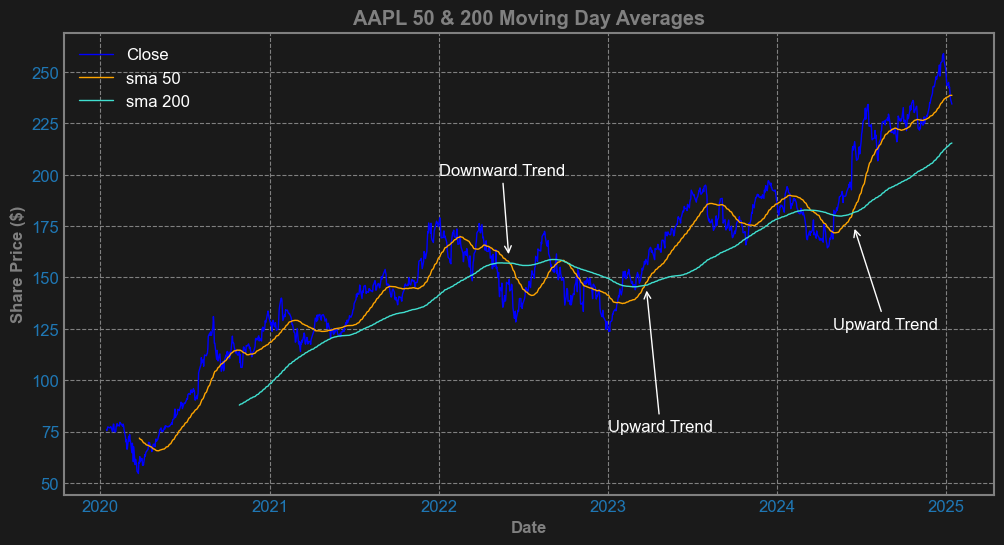

In [282]:
# Overlay simple moving averages onto the previous price chart.

plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots(figsize = (12, 6))

# Title.
ax.set_title(f'{ticker} {str(short_window)} & {str(long_window)} Moving Day Averages', weight='bold', color = 'grey')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'grey')
ax.set_ylabel('Share Price ($)', weight ='bold', color = 'grey')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))

plt.legend(loc=2)

# Annotations 
### Note: Annotations below are specific for AAPL ticker ###
# They will need to be adjusted for other tickers
# https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/plotting-time-series?ex=9

ax.annotate("Downward Trend", 
            xy=(pd.Timestamp("2022-06-01"),160),
            xytext=(pd.Timestamp("2022-01-01"),200),
            arrowprops={"arrowstyle":"->", "color":"white"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2023-03-25"),145),
            xytext=(pd.Timestamp("2023-01-01"),75),
            arrowprops={"arrowstyle":"->", "color":"white"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2024-06-15"),175),
            xytext=(pd.Timestamp("2024-05-01"),125),
            arrowprops={"arrowstyle":"->", "color":"white"})

In the abovew plot, the simple moving averages have been overlayed onto the share price chart. Moving average crossovers (MAC) can indicate trends upwards or downwards. Some of the signals have been annoted above.

## Relative Strength Index (RSI) ##

"*The RSI measures the velocity and magnitude of price movements. It ranges from 0 to 100 and is commonly used to identify overbought or oversold conditions.*" [Source: pyquantnews](https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading).
 
"*Typically, an RSI above 70 indicates that a stock is oberbought, while an RSI below 30 suggests it is oversold*" [Source: slingacademy](https://www.slingacademy.com/article/applying-rsi-macd-and-bollinger-bands-with-ta-lib/)

In [283]:
# Function for RSI
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading

def calculate_rsi(data, rsi_window):
   # calculate difference from previous value
   delta = data.diff()
   # Define gain / loss
   gain = (delta.where(delta > 0, 0)).rolling(window=rsi_window).mean()
   loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_window).mean()
   # Calculate Relative Strength
   rs = gain / loss
   # Calculate Relative Strength Index
   rsi = 100 - (100 / (1 + rs))
   return rsi

In [284]:
# Set rolling windows for Relative Strength Index (RSI).
rsi_window = 14

# Add columns for the RSI to the Data Frame, using function created previously.
market_data['rsi ' + str(rsi_window)] = calculate_rsi(market_data['Close'], rsi_window)

# Check the Data Frame.
market_data

,Close,High,Low,Open,Volume,sma 50,sma 200,rsi 14
Date,,,,,,,,
2020-01-14,75.784447,76.969643,75.660843,76.758781,161954400,NaN,NaN,NaN
2020-01-15,75.459686,76.467949,75.025841,75.583298,121923600,NaN,NaN,NaN
2020-01-16,76.404915,76.516411,75.641449,76.005005,108829200,NaN,NaN,NaN
2020-01-17,77.250801,77.253220,76.346756,76.654564,137816400,NaN,NaN,NaN
2020-01-21,76.727264,77.321068,76.589111,76.877533,110843200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,214.091676,45.992307
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,214.448965,38.659138
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900,238.598924,214.804171,35.424536


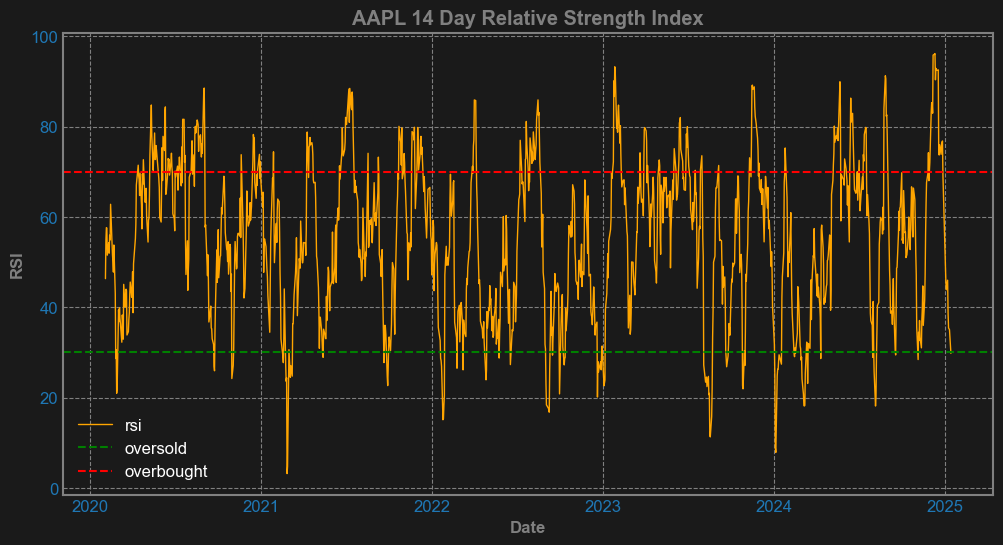

In [285]:
# https://mayerkrebs.com/relative-strength-index-rsi-in-python/
# Plot the Relative Strength Index

plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots(figsize = (12, 6))

# Title.
ax.set_title(f'{ticker} {str(rsi_window)} Day Relative Strength Index', weight='bold', color = 'grey')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'grey')
ax.set_ylabel('RSI', weight ='bold', color = 'grey')

# Plot the RSI
ax.plot(market_data['rsi '+ str(rsi_window)], label = 'rsi', color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold (when rsi < 30)
ax.axhline(30, linestyle='--', label = 'oversold', linewidth=1.5, color='green')
# Overbought (when rsi >70)
ax.axhline(70, linestyle='--', label = 'overbought', linewidth=1.5, color='red')
ax.legend()

The RSI plot above shows values oscilating between 0 and 100. When the RSI moves above red dashed line, it is an indication that the share is overbought, signalling a 'Sell' Order. When it moves below the green dashed line, it is an indication that the share is oversold, signalling a 'Buy' Order.

## MACD ##

[Investopedia's definition](https://www.investopedia.com/terms/m/macd.asp) of moving average convergence/divergence is "*a technical indicator to help investors identify price trends, measure trend momentum, and identify entry points for buying or selling. Moving average convergence/divergence (MACD) is a trend-following momentum indicator that shows the relationship between two exponential moving averages (EMAs) of a security’s price.*"

In [286]:
# To calculate MACD, first need to create a function to calculate exponential moving average (EMA), taking data and time period as inputs.
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading
def calculate_ema(data, window):
   return data.ewm(span=window, adjust=False).mean()

In [287]:
# Leveraging the EMA fuction above, create function to return macd and macd_signal.
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading
def calculate_macd(data, short_window, long_window, signal_window):
   short_ema = calculate_ema(data, short_window)
   long_ema = calculate_ema(data, long_window)
   macd = short_ema - long_ema
   signal = calculate_ema(macd, signal_window)
   return macd, signal

https://www.investopedia.com/terms/m/macd.asp
- The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
- The signal line is a nine-period EMA of the MACD line.
- MACD is best used with daily periods, where the traditional settings of 26/12/9 days is the default.

In [288]:
# Set macd windows
macd_short_window = 12
macd_long_window = 26
macd_signal_window = 9

# Add macd columns to Data Frame, using traditional seetings.
# https://medium.com/@armand_aguilar/macd-with-python-9ddf2548dfb5
market_data['macd'], market_data['macd_signal'] = calculate_macd(market_data['Close'], macd_short_window, macd_long_window, macd_signal_window)
market_data['macd_diff'] = market_data['macd'] - market_data['macd_signal']

# Check the Data Frame.
market_data

,Close,High,Low,Open,Volume,sma 50,sma 200,rsi 14,macd,macd_signal,macd_diff
Date,,,,,,,,,,,
2020-01-14,75.784447,76.969643,75.660843,76.758781,161954400,NaN,NaN,NaN,0.000000,0.000000,0.000000
2020-01-15,75.459686,76.467949,75.025841,75.583298,121923600,NaN,NaN,NaN,-0.025907,-0.005181,-0.020725
2020-01-16,76.404915,76.516411,75.641449,76.005005,108829200,NaN,NaN,NaN,0.029494,0.001754,0.027740
2020-01-17,77.250801,77.253220,76.346756,76.654564,137816400,NaN,NaN,NaN,0.140041,0.029411,0.110630
2020-01-21,76.727264,77.321068,76.589111,76.877533,110843200,NaN,NaN,NaN,0.183292,0.060187,0.123105
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,214.091676,45.992307,2.571642,4.396155,-1.824513
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,214.448965,38.659138,1.845344,3.885993,-2.040649
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900,238.598924,214.804171,35.424536,1.294365,3.367667,-2.073302


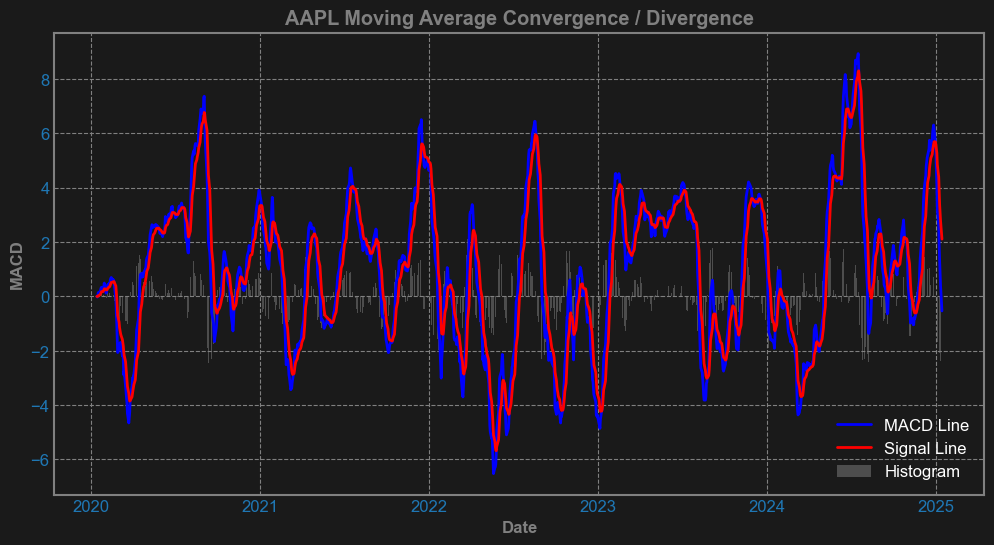

In [289]:
# https://mayerkrebs.com/relative-strength-index-rsi-in-python/
# PLot the Relative Strength Index

plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots(figsize = (12, 6))

# Title.
ax.set_title(f'{ticker} Moving Average Convergence / Divergence', weight='bold', color = 'grey')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'grey')
ax.set_ylabel('MACD', weight ='bold', color = 'grey')

# Plot the MACD
ax.plot(market_data['macd'],label='MACD Line',color='blue')
ax.plot(market_data['macd_signal'], label='Signal Line', color='red')
ax.bar(market_data.index, market_data['macd_diff'],label='Histogram',color='grey',alpha=0.5)
ax.legend()

Using MACD as a technical indicator, traders may buy the share when the MACD line crosses above the signal line and sell (or "short") the share when the MACD line crosses below the signal line.

Combining the three different technical indicators together:

[None, None, None, None, None, None, None]

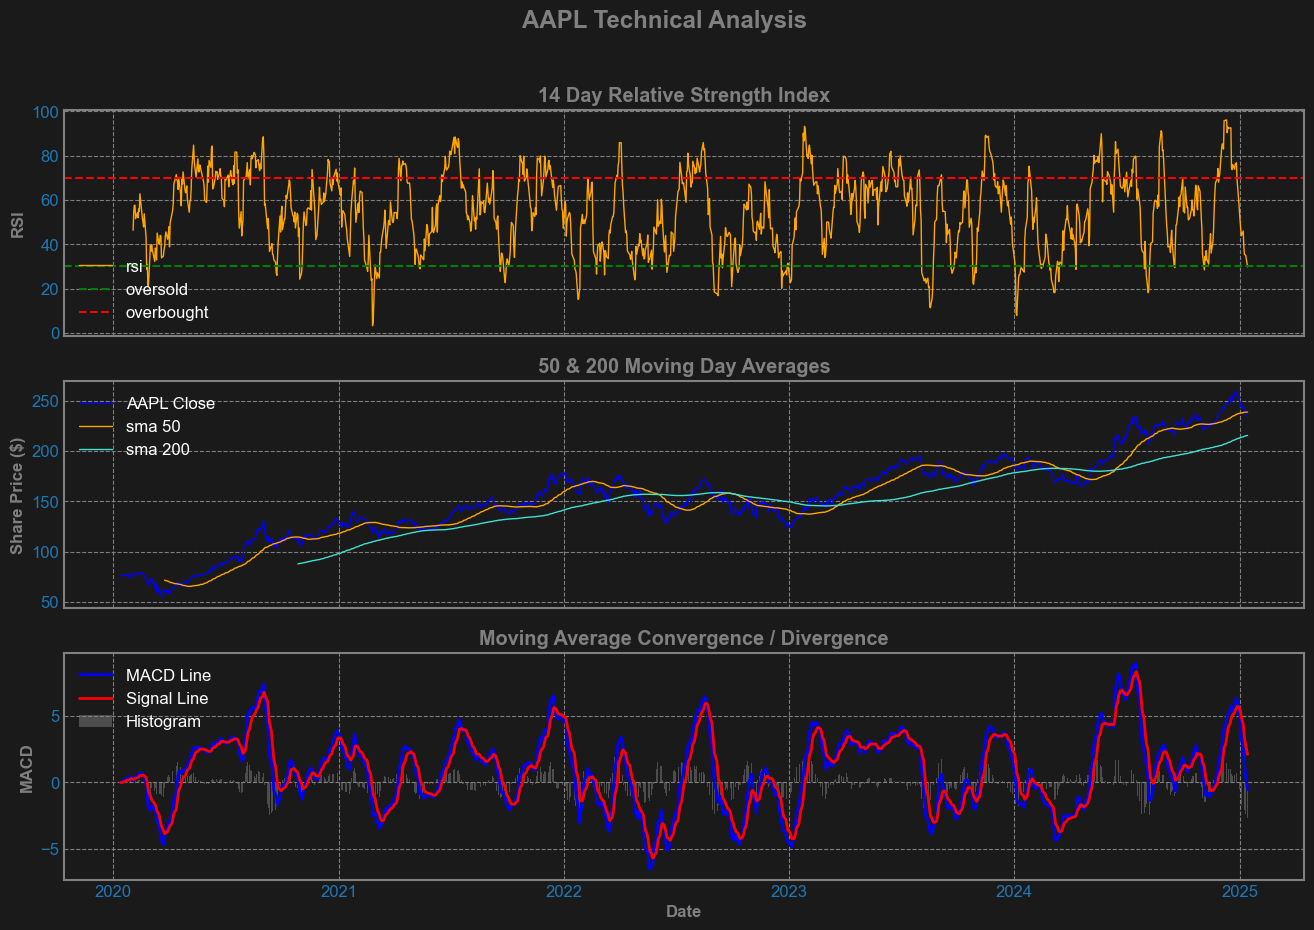

In [291]:
# Overlay simple moving averages onto the previous price chart.

plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and set title
fig = plt.figure(figsize = (16, 10))
fig.suptitle(f'{ticker} Technical Analysis', weight='bold', color = 'grey')

# Create grid Spec
# https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html
spec = gridspec.GridSpec(ncols=1, nrows=3, figure = fig, height_ratios=[1,1,1])

# Create gridded subplots
ax_rsi = fig.add_subplot(spec[0,0])
ax = fig.add_subplot(spec[1,0], sharex = ax_rsi)
ax_macd = fig.add_subplot(spec[2,0], sharex = ax)

# Axis Titles
# Title.
ax_rsi.set_title(f'{str(rsi_window)} Day Relative Strength Index', weight='bold', color = 'grey')
ax.set_title(f'{str(short_window)} & {str(long_window)} Moving Day Averages', weight='bold', color = 'grey')
ax_macd.set_title('Moving Average Convergence / Divergence', weight='bold', color = 'grey')

# Axis labels.
ax_rsi.set_ylabel('RSI', weight ='bold', color = 'grey')
ax.set_ylabel('Share Price ($)', weight ='bold', color = 'grey')
ax_macd.set_ylabel('MACD', weight ='bold', color = 'grey')
ax_macd.set_xlabel('Date', weight='bold', color = 'grey')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = f'{ticker} Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))
ax.legend()


# Plot the MACD
ax_macd.plot(market_data['macd'],label='MACD Line',color='blue')
ax_macd.plot(market_data['macd_signal'], label='Signal Line', color='red')
ax_macd.bar(market_data.index, market_data['macd_diff'],label='Histogram',color='grey',alpha=0.5)
ax_macd.legend()

# Plot the RSI
ax_rsi.plot(market_data['rsi '+ str(rsi_window)], label = 'rsi', color='orange', linewidth=1)
ax_rsi.axhline(30, linestyle='--', label = 'oversold', linewidth=1.5, color='green')
ax_rsi.axhline(70, linestyle='--', label = 'overbought', linewidth=1.5, color='red')
ax_rsi.legend()

# Remove xlabel from top two axes
# https://stackoverflow.com/questions/66586032/multiple-subplots-with-shared-axis-inside-gridspec-item
plt.setp(ax_rsi.get_xticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)


## Summary ##

This notebook has scratched the surface of technical analysis with Python. Although only three technical indicators have been covered, the princiapls have been demonstrated and these can easily be extended.

By replaceing the APPL ticker, this notebook can be used to calculate and visualise SMA, RSI and MACD indicators for other shares.

Further extenions to this notebook would be to include:
1. Additional technical indicators.
2. Trading signals based off of the indicators.
3. Backtesting trading strategies.
4. Visualising trading 'Buy' or 'Sell' triggers.

## End